<h3><center>Programming for Data Analytics - Project 1</center></h3>
<h1><center>Fisic and sexual violance against women in italy</center></h1>

### **1. Introduction**

This project focuses on assessing the probability that a woman in Italy, aged between 15 and 70, will experience physical/sexual violence by her partner/ex-partner in 5 years time. 
To achieve this, various datasets and microdatasets from the [ISTAT [1]](https://esploradati.istat.it/databrowser/#/) have been utilized.

ISTAT, the Italian National Institute of Statistics (Istituto Nazionale di Statistica), operates as the official statistical agency of Italy, functioning under the supervision of the Italian Ministry of Economy and Finance. It is tasked with collecting, producing, and disseminating statistical information across diverse aspects of Italian society and the economy.

The study considers four variables, and a dataset has been constructed to explore, based on each combination of these variables, the probability and likelihood of a woman experiencing physical/sexual violence by her partner/ex-partner in her lifetime.

The four variables under consideration are:

1. Area of residence
2. Level of education
3. Marital status
4. Occupational level

By combining the probabilities associated with each variable (e.g., the probability that a woman with a particular level of education will endure violence), the project aims to calculate, using a binomial distribution, whether the event will occur or not. 



### **2. Import the needed library**

As a first stap I would like import the library that will be needed in the project. 
they are:

- **pandas**: This library is widely used for data manipulation and analysis. It provides data structures like DataFrame for efficient data manipulation with integrated indexing. Pandas is particularly useful for handling structured data and working with time-series data numpy [[]](https://pandas.pydata.org/).
- **numpy**: Numpy is a powerful library for numerical operations in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these elements. Many other scientific and data analysis libraries in Python, including pandas, are built on top of NumPy [[]](https://numpy.org/).
- **seaborn**: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is particularly useful for creating informative and visually appealing statistical graphics, making it easier to explore and understand complex datasets [[]](https://seaborn.pydata.org/).
- **matplotlib**: Matplotlib is a comprehensive 2D plotting library for Python. It provides a wide variety of static, animated, and interactive plots for visualizing data [[]](https://matplotlib.org/). 

In [779]:
#Importing the pandas library for data manipulation and analysis
import pandas as pd
# Importing the numpy library for numerical operations and array manipulations
import numpy as np
# Importing the seaborn library for data visualization
import seaborn as sns
# Importing the matplotlib library for data visualization 
import matplotlib.pyplot as plt

### **3. Area of resident**

The **region of residence** plays a significant role in analyzing the risk of violence against women. It is often observed that the poorest regions are associated with higher instances of sexual and physical violence against women. This correlation can be attributed to a combination of economic and cultural factors. Women residing in economically disadvantaged regions face greater challenges in personal development, have limited access to resources for preventing and escaping violence. In addition, the probability of endure violence may be influenced by a cultural environment that tolerates such phenomena. This interconnectedness creates a complex scenario where the acceptance of violence against women becomes more prevalent [[]](https://www.ladynomics.it/conoscere-la-violenza-economica-2a-puntata-la-poverta/).

Italy can be divided into three main regions: **North, South (including islands), and Central**. Historically, the Northern region has exhibited higher economic development, providing more employment and developmental opportunities for its population. Conversely, the South is acknowledged as the economically poorest area of Italy, characterized by a significantly affected employment rate and a culture that mirrors this economic situation. The Central region falls in between these extremes. Otherwise, the South is know as a place with a strong cultural identity.

In the process of creating the database:
1.  our first step involves determining the **probability of women aged 15 to 70 experiencing violence segmented by region**, considering the distinct characteristics of the North, South, and Central regions.
2. Following this, we will construct an initial dataframe comprising **200 randomly generated entries**, strategically distributed among the three regions: North, South, and Central.


#### **3.1 Regional Disparities: Probability of Violence Against Women Across Italy's Main Regions**

As a preliminary step, we need to calculate the probability that a woman residing in the South, North, or Centre will experience violence from a partner or ex-partner over her lifetime.

To achieve this, ISTAT has published microdatasets that explore the impact of various variables on violence against women. Specifically, there is a dataset available on the website that connects the region of residence with the percentage of women who endure violence [[]](https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0840JUS,1.0/JUS_VIOLENCE).

Our next tasks involve importing the dataset, exploring its contents, and performing data cleaning and manipulation to derive the probability of violence associated with each region.

    - Import the dataset

The dataseset has been imported from the ISTAT [[A]](https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0840JUS,1.0/JUS_VIOLENCE) as a CSV and saved on the repository. The folder **DataSet** contain all the dataset used on the current project. We will them use the **read_csv()** function to import it as a dataframe unsing pandas [[]](https://www.w3schools.com/python/pandas/pandas_csv.asp). 

In [780]:
# Importing the dataset on violence divided per region
violence_by_region = pd.read_csv('DataSet/Violence divided per region.csv')

    - Ceck missing value 

We can now check for missing values using the isnull() function [[]](https://note.nkmk.me/en/python-pandas-nan-judge-count/). The dataset reveals missing values only in the 'flag' and 'flag codeds' columns. However, upon further inspection of the dataset, it is evident that these columns are not relevant, as they are empty. Therefore, we will be able after to drop those columns 

In [781]:
# Printing a header to indicate the section related to missing values for violence per region
print(f'== Missing values for "violence by region" ==')
# Using the isnull() function to check for missing values and summing them up
missing_values_count = violence_by_region.isnull().sum()
# Printing the count of missing values for each column in the dataset
print(missing_values_count)

== Missing values for "violence by region" ==
ITTER107                 0
Territory                0
TIPO_DATO_VIOLENZA       0
Data type                0
TIPOAUT                  0
Perpetrator              0
TIPOVIOLENZA             0
Type of violence         0
TIME                     0
Select time              0
Value                    0
Flag Codes            1204
Flags                 1204
dtype: int64


    - Data exploration, manipulation and cleaning 

*Sampling the dataset*

To begin our dataset observation and identify columns and rows for removal, we can utilize the **sample()** function [[]](https://www.geeksforgeeks.org/python-pandas-dataframe-sample/). This function will display a random selection of rows from the specified dataset, aiding us in assessing the data and making informed decisions on what to remove."

In [782]:
# Printing a header to indicate that the following lines are a sample from the "violence by region" dataset
print(f'== Sample lines from "violence by region" ==')
# Using the sample() function to display a random selection of 5 rows from the dataset
sample_data = violence_by_region.sample(5)
# Printing the sampled data
print(sample_data)

== Sample lines from "violence by region" ==
     ITTER107                       Territory TIPO_DATO_VIOLENZA  \
782      ITF1                         Abruzzo      W16_70_PNP_LT   
1046     ITF6                        Calabria      W16_70_PNP_LT   
1120     ITG1                         Sicilia      W16_70_CFP_Y5   
261      ITDA  Trentino Alto Adige / Südtirol      W16_70_PNP_LT   
224      ITC4                       Lombardia     W16_70_PNP_M12   

                                              Data type       TIPOAUT  \
782   women aged 16-70 years who have suffered viole...     ANY_P_NOP   
1046  women aged 16-70 years who have suffered viole...           NOP   
1120  women aged 16-70 years who have suffered viole...  CURR_OR_FORM   
261   women aged 16-70 years who have suffered viole...     ANY_P_NOP   
224   women aged 16-70 years who have suffered viole...     ANY_P_NOP   

                            Perpetrator TIPOVIOLENZA    Type of violence  \
782   any man (partner and non-

*Dropping useless columns and renaming for better clarity*

After observing the dataset, it appears that most columns contain duplicate or irrelevant data. Consequently, our initial step involves dropping empty or redundant columns using the **drop()** function [[]](https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/). This will be done after defining a list of columns to be dropped. 

We can them rename for clairty some of the columns. At the porpuse we will use the **rename()** function [[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html), [[]](https://www.kdnuggets.com/2022/11/4-ways-rename-pandas-columns.html). 

In [783]:
# List of columns to be removed from the 'violence_by_region' DataFrame
columns_to_be_removed = ['ITTER107', 'TIPO_DATO_VIOLENZA', 'TIPOAUT', 'TIPOVIOLENZA',
       'Select time', 'Flag Codes', 'Flags']
# Remove the specified columns from the 'violence_by_region' DataFrame
violence_by_region = violence_by_region.drop(columns=columns_to_be_removed)
# Renaming columns in a Pandas DataFrame for clarity
violence_by_region.rename(columns={"TIME": "Year", 
                                   'Value':'%_Violence_Territory',
                                   'Territory': 'AreaOfResidence'}, inplace=True)

The **%_Violence_Territory** column contains the percentage of women with those characteristics who endured violence. For better clarity, we can represent this percentage as a decimal number between 0 and 1. 

In [784]:
# Modify the format of the '%_Violence_Territory' column to be in the range [0, 1]
violence_by_region['%_Violence_Territory'] = violence_by_region['%_Violence_Territory'] / 100

*Remove the duplicate or not relevant rows of the dataset*

After observation we can see that some columns contain duplicate or not relevant data. 
Focusing on the **perpetrator** column we can explore the unique() [[]](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) value to check for relevant data.

In [785]:
# Displaying unique values in the 'Perpetrator' column of the 'violence_by_region' DataFrame
violence_by_region['Perpetrator'].unique()

array(['any man (partner and non-partner)', 'man non-partner',
       'current partner or former partner', 'current partner',
       'former partner'], dtype=object)

From above we can see that the only relevant value for our research is 'current partner or former partner'. 
In the same way I have checked the other column and determine what are the relevant data that need to be kept.

Here the list of value to retain per columns name:

| Column Name        | Value(s)                                                                                 |
|--------------------|-------------------------------------------------------------------------------------------|
| Type of Violence   | physical or sexual                                                                   |
| Perpetrator        | current partner or former partner                                                     |
| Data type          | Women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)|
| AreaOfResidence    | Keep everything is not 'Italy'|

For the porpuse a **filter_and_replace()** function will be defined. The function filters, using the **.loc** method [[]](https://blog.hubspot.com/website/filter-rows-pandas), replaces values, using the **replace()** function [[]](https://www.youtube.com/watch?app=desktop&v=8Y1UkY0oAXM) in specific columns and the modified dataframe is returned. 
Finally the code keep for the column 'AreaOfResidence' the value that are not 'Italy'.

In [786]:
# Function to filter and replace values in the 'violence_by_region' DataFrame
def filter_and_replace(dataframe):
    # Filter for rows where 'Type of violence' is 'physical or sexual'
    dataframe = dataframe.loc[dataframe['Type of violence'] == 'physical or sexual']
    # Replace 'physical or sexual' with 'Physical/Sexual' in the 'Type of violence' column
    dataframe['Type of violence'] = dataframe['Type of violence'].replace('physical or sexual', 'Physical/Sexual')
    # Filter for rows where 'Perpetrator' is 'current partner or former partner'
    dataframe = dataframe.loc[dataframe['Perpetrator'] == 'current partner or former partner']
    # Replace 'current partner or former partner' with 'Partner/Ex Partner' in the 'Perpetrator' column
    dataframe['Perpetrator'] = dataframe['Perpetrator'].replace('current partner or former partner', 'Partner/Ex Partner')
    # Filter for rows where 'Data type' matches a specific condition
    dataframe = dataframe.loc[dataframe['Data type'] == 'women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)']
    # Replace 'women aged 16-70 years who have suffered violence lifetime (% of ever-partnered women 16-70 years)' with 'Victims 16-70 - lifetime' in the 'Data type' column
    dataframe['Data type'] = dataframe['Data type'].replace('women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)', 'Victims 16-70 - 5 years')
    return dataframe

# Applying the filter_and_replace function to the 'violence_by_region' DataFrame
violence_by_region = filter_and_replace(violence_by_region)

# Filtering out rows where 'Territory' is 'Italy'
violence_by_region = violence_by_region.loc[violence_by_region['AreaOfResidence'] != 'Italy']

C:\Users\anton\AppData\Local\Temp\ipykernel_48044\2938192141.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Type of violence'] = dataframe['Type of violence'].replace('physical or sexual', 'Physical/Sexual')


*Classifying observations in the 'AreaofResidence' column based on three main areas: North, South, and Centre*

Next, we need to determine the area of residence for each observation. The dataset categorizes observations into regions and two autonomous provinces. In Italy, regions and autonomous provinces are administrative subdivisions with varying degrees of self-governance. Italy comprises 20 regions, with 8 in the North, 4 in the Centre, and 8 in the South. Additionally, the two autonomous provinces to which the observations are assigned belong to the North. [[]](https://www.tuttitalia.it/statistiche/nord-centro-mezzogiorno-italia/).

In [787]:
# Define a dictionary for mapping regions to broader areas
replacements_regions = {
    'Liguria': 'North',
    'Lombardia': 'North',
    'Piemonte': 'North',
    "Valle d'Aosta / Vallée d'Aoste": 'North',
    'Emilia-Romagna': 'North',
    'Friuli-Venezia Giulia': 'North',
    'Trentino Alto Adige / Südtirol': 'North',
    'Veneto': 'North',
    'Provincia Autonoma Bolzano / Bozen': 'North',
    'Provincia Autonoma Trento': 'North',
    'Lazio': 'Centre',
    'Marche': 'Centre',
    'Toscana': 'Centre',
    'Umbria': 'Centre',
    'Abruzzo': 'South',
    'Basilicata': 'South',
    'Calabria': 'South',
    'Campania': 'South',
    'Molise': 'South',
    'Puglia': 'South',
    'Sardegna': 'South',
    'Sicilia': 'South',
}

# Replace values in the 'AreaOfResidence' column based on the defined mapping
violence_by_region['AreaOfResidence'] = violence_by_region['AreaOfResidence'].replace(replacements_regions)

    - Determining the Final Probability Table

Finally, we need to extract the ultimate table that displays the probability of a woman residing in each of the three areas enduring physical/sexual violence from a partner/ex-partner. This will be accomplished by utilizing the groupby() [[]](https://realpython.com/pandas-groupby/) [[]](https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/) function and averaging the values.


In [788]:
# Grouping the 'violence_by_region' DataFrame by 'AreaOfResidence' and calculating the mean of '%_Violence_Territory' for each group
violence_by_region_probability = violence_by_region.groupby('AreaOfResidence')['%_Violence_Territory'].mean().reset_index()

# Displaying the resulting DataFrame showing the probability of violence for each area of residence
print(violence_by_region_probability)

  AreaOfResidence  %_Violence_Territory
0          Centre              0.050250
1           North              0.045900
2           South              0.050875


To better understand the data we can now plot a bar using the **barplot()** function [[]](https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/), [[]](https://stackoverflow.com/questions/43214978/how-to-display-custom-values-on-a-bar-plot).

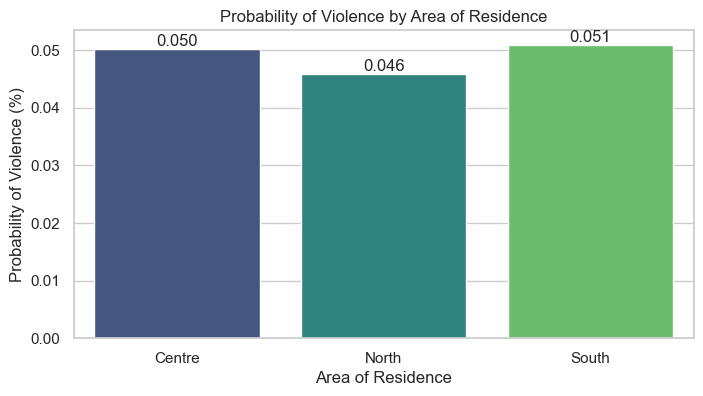

In [789]:

# Set the style to "whitegrid" for the seaborn plot
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Creating a bar plot using seaborn
ax = sns.barplot(x='AreaOfResidence', y='%_Violence_Territory', hue='AreaOfResidence', data=violence_by_region_probability, palette="viridis")

# Adding a label at the top of each bar plot 
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')
    
# Adding labels and title to the plot
plt.xlabel('Area of Residence')  # X-axis label
plt.ylabel('Probability of Violence (%)')  # Y-axis label
plt.title('Probability of Violence by Area of Residence')  # Title of the plot

# Displaying the plot
plt.show()

As we can see, the area with the highest probability of experiencing violence is the South, followed by the Centre, and finally, the North. As explained before, this could be the result of multifaceted variables such as economic and cultural factors. 

#### **3.2 Generating a DataFrame with 200 Entries for the Variable "AreaOfResidence"**

We will create the **violence_against_women** DataFrame, comprising 200 observations of women characterized by a combination of four variables: Area of Residence, Level of Education, Occupational Status, and Marital Status. Finally it will indicate whether a woman with the specified set of characteristics will experience physical and sexual violence from a partner or ex-partner in her lifetime.

As a first step, we can generate 200 observations that display the variable 'AreaOfResidence.' The entries will be divided among three areas:

- North
- South
- Centre

To generate the entries, we can use a **Random Choice function from NumPy** [[]](https://www.geeksforgeeks.org/random-choices-method-in-python/). The random choice function allows us to randomly assign each observation to one of the specified areas based on predetermined probabilities or weights.

To ensure the realism of our dataset, we will utilize the distribution of the Italian population from the 2020 census as predetermined probabilities or weights [[]](https://www.istat.it/it/files/2021/12/CENSIMENTO-E-DINAMICA-DEMOGRAFICA-2020.pdf). 

In [790]:

# Define the probabilities for each area of residence
prob_population = [0.464, 0.198, 0.338]
# List of areas
area_list = ['North', 'South', 'Centre']
# Use the Random Choice function to generate 'AreaOfResidence' entries in the DataFrame
data = np.random.choice(area_list, p=prob_population, size=200)
# Create the 'violence_against_women' DataFrame with the generated 'AreaOfResidence' entries
violence_against_women = pd.DataFrame(data, columns=['AreaOfResidence'])

# Display the first few rows of the DataFrame
violence_against_women.head()


,AreaOfResidence
0,North
1,North
2,South
3,Centre
4,Centre


### **4. Education Level**

Exploring the educational level of women unveils a crucial variable that can significantly impact the landscape of violence against them. The correlation between a woman's educational background and the prevalence of violence is an aspect worth exploring. Higher educational attainment emerges as a potential safeguard, equipping women with knowledge and resources that empower them to navigate and reduce the risk of violence. Moreover, it provides easier access to economic independence, resulting in more flebity to escape from violent situations [[]](https://www.ingenere.it/articoli/fare-i-conti-con-la-violenza).

For the popuse of this analysis we will devide the women in the different level of education:

1. **Primary Education**: Individuals who have completed only primary school education (typically up to 13 years of age).
2. **Secondary education**: Individuals who have successfully completed high school (typically up to 19 years of age).
3. **Higher education**: This category encompasses all forms of higher education, including degrees, bachelor's degrees, master's degrees, PhDs, and more.

As part of our analysis, we will:
1. Calculate the probability that a woman endures physical/sexual violence from a partner and an ex-partner based on the level of education.
2. Add to the **violence_against_women* dataset the distribution for the education level.

#### **4.1 Examining the Probability of Violence Against Women Across Different Education Levels**

With the purpose of the analysis, we will use the dataset **violence_per_educational_level**, sourced from the ISTAT website. This dataset provides insights into the percentage of women who have experienced physical/sexual violence from a partner/ex-partner, categorized by education level. 

    - Import the dataset 

The dataset have been saved in the folder **DataSet**.

In [791]:
# Loading the CSV file into a DataFrame
violence_per_educational_level = pd.read_csv('DataSet/violence_per_educational_level.csv')

    - Check for missing value 

We can now check for missing values. Similar to previous instances, only two columns contain missing values. Since these columns are not relevant for the analysis, they will be dropped accordingly.

In [792]:
# Printing a header to indicate the section related to missing values for violence per region
print(f'== Missing values for "violence_per_educational_level" ==')
# Using the isnull() function to check for missing values and summing them up
missing_values_count = violence_per_educational_level.isnull().sum()
# Printing the count of missing values for each column in the dataset
print(missing_values_count)

== Missing values for "violence_per_educational_level" ==
ITTER107                0
Territory               0
TIPO_DATO_VIOLENZA      0
Data type               0
TIPOAUT                 0
Perpetrator             0
TIPOVIOLENZA            0
Type of violence        0
TITOLO_STUDIO           0
Educational level       0
TIME                    0
Select time             0
Value                   0
Flag Codes            300
Flags                 300
dtype: int64


    - Data exploration, manipulation and cleaning 

*Removing useless or redundant columns and rename some of them for clarity*

After observing the dataset, we can now proceed to drop columns containing irrelevant or duplicate information for our analysis. Additionally, we will rename some columns to enhance clarity.

We will use the same structure used before. We will remove also the column 'Year' and 'Territory' as it has been confirmed it contain only one year observation. 

In [793]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['ITTER107', 'Territory', 'TIPO_DATO_VIOLENZA', 'TIME', 'TIPOAUT', 'TIPOVIOLENZA', 'TITOLO_STUDIO', 'Select time', 'Flag Codes', 'Flags']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
violence_per_educational_level = violence_per_educational_level.drop(columns=columns_to_be_removed)

# Define columns to rename 
columns_to_rename = {
    'Value': '%_Violence_Education',  # Rename 'Value' column to '%_Violence_Education'
    'Educational level': 'Education level',  # Rename 'Educational level' column to 'Education level'
    'Territory': 'AreaOfResidence'  # Rename 'Territory' column to 'AreaOfResidence'
}

# Use the rename method to apply the column name changes
violence_per_educational_level = violence_per_educational_level.rename(columns=columns_to_rename)

*Change the format of the %_Violence_Education column*

We can now divide the **%_Violence_Education** value by 100 to have the percentage expressed as a number between 0 and 1. 

In [794]:
violence_per_educational_level['%_Violence_Education'] = violence_per_educational_level['%_Violence_Education']/100


*Remove the duplicate or not relevant rows of the dataset*

As before some columns containt duplicate value that need to be removed. 

Here the data that we will need to keep for each column:

| Column Name        | Value(s)                                                                                 |
|--------------------|-------------------------------------------------------------------------------------------|
| Type of Violence   | physical or sexual                                                                   |
| Perpetrator        | current partner or former partner                                                     |
| Data type          | women aged 16-70 years who have suffered violence lifetime (% of ever-partnered women 16-70 years)|
| Education level    | Keep everything is not 'Total'|

As the dataset presents the same format and type of data as the previous one, we can reuse the **filter_and_replace** function defined earlier for filter the value needed and rename the rest in a more freindly way. Additionally, we will retain all entries in the 'Education level' column except for 'Total'.

In [795]:
# Filtering the DataFrame to select specific rows based on conditions

# call the function to filter and replace column 'Perpetrator' and 'DataType' previously defined
violence_per_educational_level = filter_and_replace(violence_per_educational_level)
# remove line total from educational level
violence_per_educational_level = violence_per_educational_level.loc[violence_per_educational_level['Education level'] != 'total']

C:\Users\anton\AppData\Local\Temp\ipykernel_48044\2938192141.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Type of violence'] = dataframe['Type of violence'].replace('physical or sexual', 'Physical/Sexual')


In [796]:
violence_per_educational_level

,Data type,Perpetrator,Type of violence,Education level,%_Violence_Education
172,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,diploma of upper secondary education and Certi...,0.052
173,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,"no educational degree, final assessment (Prima...",0.026
174,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,diploma of lower secondary education,0.050
175,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,"university diploma, bachelor’s degree, master’...",0.061


In [797]:
violence_per_educational_level['Education level'].value_counts()

Education level
diploma of upper secondary education and Certification of higher technical specialisation     1
no educational degree, final assessment (Primary school)                                      1
diploma of lower secondary education                                                          1
university diploma, bachelor’s degree, master’s degree, academy Conservatory old programme    1
Name: count, dtype: int64

*Mapping the education level in the three main categories*

The dataset contains various observations for the 'Education level' column, reflecting the diversity of educational levels that can be reach in Italy. However, for the purpose of this study, we aim to classify them into three main categories:

1. Primary education
2. Secondary education
3. Higher education

Here are the main categories assigned to each unique value in the 'Education level' column:

| Main Category          | Education Level                                                |
|------------------------|----------------------------------------------------------------|
| Secondary Education    | diploma of upper secondary education and Certification of higher technical specialisation |
| Primary Education      | no educational degree, final assessment (Primary school)        |
| Primary Education     | diploma of lower secondary education                           |
| Higher Education       | university diploma, bachelor’s degree, master’s degree, academy Conservatory old programme |

The substituction will be performad using .str.contains() [[]](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html), [[]](https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas).

In [798]:
# Assign 'Primary Education' to values containing 'Primary school' or 'diploma of lower' in the 'Education level' column
violence_per_educational_level.loc[violence_per_educational_level['Education level'].str.contains('Primary school'), 'Education level'] = 'Primary Education'
violence_per_educational_level.loc[violence_per_educational_level['Education level'].str.contains('diploma of lower'), 'Education level'] = 'Primary Education'

# Substitute values containing the word "laurea" in the 'Education level' column with 'Higher Education'
violence_per_educational_level.loc[violence_per_educational_level['Education level'].str.contains('university'), 'Education level'] = 'Higher Education'

# Substitute values containing the word "diploma" in the 'Education level' column with 'Secondary Education'
violence_per_educational_level.loc[violence_per_educational_level['Education level'].str.contains('diploma of upper'), 'Education level'] = 'Secondary Education'


    - Determining the Final Probability Table

Finally We can extract the final table showing the probability that a women endure fisical and sexual violence by the partner/ex parter in 5 years time. 

In [799]:
# Group the DataFrame by 'Education level'
violence_educational_level_probability = violence_per_educational_level.groupby('Education level')['%_Violence_Education'].mean().reset_index()

# Display the resulting DataFrame showing the mean probability of violence for each education level
violence_educational_level_probability

,Education level,%_Violence_Education
0,Higher Education,0.061
1,Primary Education,0.038
2,Secondary Education,0.052


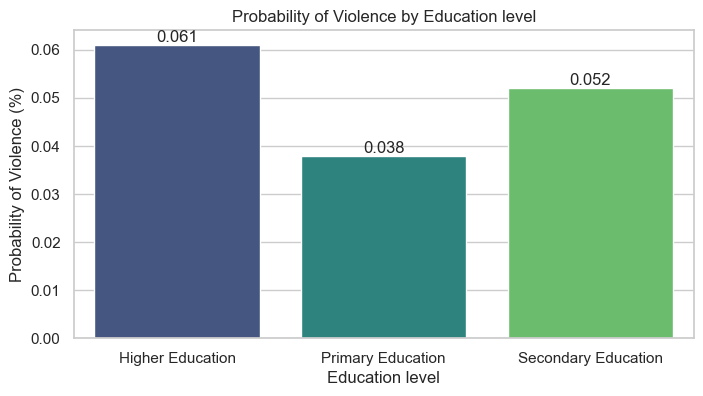

In [800]:
# Set the style to "whitegrid" for the seaborn plot
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Creating a bar plot using seaborn
ax = sns.barplot(x='Education level', y='%_Violence_Education', hue='Education level', data=violence_educational_level_probability, palette="viridis")

# Adding a label at the top of each bar plot 
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')
    
# Adding labels and title to the plot
plt.xlabel('Education level')  # X-axis label
plt.ylabel('Probability of Violence (%)')  # Y-axis label
plt.title('Probability of Violence by Education level')  # Title of the plot

# Displaying the plot
plt.show()

As evident from the data, women with higher levels of education seem to have a higher probability of experiencing violence over the past five years. This observation, in my opinion, can be attributed to the age distribution within educational levels. Typically, women attain secondary education around the age of 19 and higher education around the age of 23.

Younger women and older women, who are more likely to have only a primary level of education in the long term, fall into the primary education category. Due to their demographic age, these groups of women have a lower probability of experiencing violence from their partner/ex-partner. This explains why women with primary education are less impacted by violence experiences in the last five years.

Similarly, women with secondary education are often not from the younger generation, and due to their age, they may be less exposed to such phenomena. The observed trends in violence probability across education levels can be contextualized by considering the demographic age distribution within each educational category. 

#####  **4.2 Calculate the education level divided per region of women with age 15+ years and add the distribution to the violence against women dataset**

The aim of this section is to calculate the probability that a woman falls into a particular level of education for each region of residence. It is known that in Italy, the education level in the North is higher than in the South. ISTAT [[]](https://www.istat.it/it/files/2022/10/Livelli-di-istruzione-e-ritorni-occupazionali-anno-2021.pdf) reveals a significant gap in education levels between the North and the South/Central regions, primarily due to economic differences.

Considering this regional variation, the distribution of educational levels in the 'violence_against_women' dataset needs to be based on the 'Area of Residence' column.

Once the probabilities for each level of education and by region are determined, these probabilities will be combined with a random choice distribution to populate the 'Education Level' column in the 'violence_against_women' dataset.

**4.2.1. Determine the probability of each level of education by Area of Residence** 

The purpose of this part is to determine the percentage of women aged 15 and above with various levels of education devided per area of residence: the North, Central, and Southern regions. This percentage will be then used to create the relevant distribution in the **violence_against_woman** dataset.

The data used for this estimation, saved in the data folder as **Instruction_level_italy**, has been downloaded from the ISTAT website [[]](https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0820EDU,1.0/DCCV_POPTIT1_UNT2020/IT1,52_1194_DF_DCCV_POPTIT1_UNT2020_2,1.0). 
The selected dataset, titled contains information on different levels of education for residents in Italy age 15 to 70, reported in thousands.

    - Import the dataset

In [801]:
# read the dataset 
education_level_italy = pd.read_csv('DataSet/Instruction_level_italy.csv')

    - Check for the missing value 

We can now check the missing value. Same as before, only 2 columns shows missing value but those 2 columns are not relevant with the analysis and they will be dropped. 

In [802]:
# Printing a header to indicate the section related to missing values for violence per region
print(f'== Missing values for "violence_educational_level_probability" ==')
# Using the isnull() function to check for missing values and summing them up
missing_values_count = education_level_italy.isnull().sum()
# Printing the count of missing values for each column in the dataset
print(missing_values_count)

== Missing values for "violence_educational_level_probability" ==
ITTER107                0
Territorio              0
TIPO_DATO_FOL           0
Tipo dato               0
SEXISTAT1               0
Sesso                   0
ETA1                    0
Classe di età           0
TITOLO_STUDIO           0
Titolo di studio        0
TIME                    0
Seleziona periodo       0
Value                   0
Flag Codes           8604
Flags                8604
dtype: int64


    - Data exploration, manipulation and cleaning 

*Removing useless or redundant columns and rename some of them for clarity*

Upon examining the dataset, I have identified several columns that can be removed because they are not relevant for the analysis or because they contain redundant information.

These columns include: ['ITTER107', 'TIPO_DATO_FOL', 'SEXISTAT1', 'Tipo dato', 'ETA1', 'TITOLO_STUDIO', 'TIME', 'Flag Codes', 'Flags'].

In [803]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['ITTER107', 'TIPO_DATO_FOL', 'SEXISTAT1', 'Tipo dato', 'ETA1', 'TITOLO_STUDIO', 'TIME', 'Flag Codes', 'Flags']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
education_level_italy = education_level_italy.drop(columns=columns_to_be_removed)

We can now replace the colum name with a more understandacle meaning for english speaker using The rename() function [[A]](https://www.kdnuggets.com/2022/11/4-ways-rename-pandas-columns.html).

In [804]:
# Renaming columns in a Pandas DataFrame
education_level_italy.rename(
    columns={"Territorio": "AreaOfResidence", 
             "Sesso": "Sex", 
             "Titolo di studio": "Education level",
             "Seleziona periodo": "Year of observation",
             "Classe di età": "Age"
             },
    inplace=True
)

*Remove Duplicate or Irrelevant Rows and Rename Values for Clarity*

The dataset contains numerous redundant or irrelevant values that require removal. Additionally, certain values need to be renamed for improved clarity.

Here are the values to be retained for each column [[]](https://datatofish.com/replace-values-pandas-dataframe/):

| Column                | Value To Keep                 | Replace With                | Reason   |
|-----------------------|-------------------------------|-----------------------------|---------------|
| 'Sex'                 | 'Femmine'                     | 'Female'                    | Only women are relevant for the study                                    |
| 'Year of observation' | '2020'                        | ---                         | Keep the last full year observation                                      |
| 'AreaOfObservation'   | 'Mezzogiorno', 'Centro', 'Nord'| 'South', 'Centre', 'North'  | Retain relevant observations; others are redundant due to overlap        |
| 'Education Level'     | All except 'Totale' | --- | Remove 'Total' values as they are redundant due to overlap |
| Classe di età | 15-64 anni | 15-64 | Retain relevant observations; others are redundant due to overlap        |


In [805]:
# keep only the rows with value "femmmine" in the sex colum
education_level_italy = education_level_italy.loc[education_level_italy['Sex'] == 'femmine']
# replace "femmine" with "female"
education_level_italy['Sex']=education_level_italy['Sex'].replace("femmine", "Female")
# keep only the rows with value "15 anni e più" in the Age column
education_level_italy = education_level_italy.loc[education_level_italy['Age'] == '15-64 anni']
# replace "15 anni e più" with "15+"
education_level_italy['Sex']=education_level_italy['Sex'].replace('15-64 anni', "15-64")

In [806]:
# keep only the rows with value "2020" in the 'Year of observation' column
education_level_italy = education_level_italy.loc[education_level_italy['Year of observation'] == '2020']

# Remove rows with 'totale' value in the 'Education level' columns 
education_level_italy = education_level_italy.loc[education_level_italy['Education level'] != 'totale']

In [807]:
# List of values to be selected from the 'Region' column
filter_list = ['Nord-est', 'Nord-ovest', 'Italia']

# Filter the DataFrame 'Instruction_level_italy' to exclude rows where 'Territorio' is in the 'filter_list'
education_level_italy = education_level_italy.loc[~education_level_italy['AreaOfResidence'].isin(filter_list)]

# replace mezzogiorno, centro and nord
value_to_be_replaced = {"Mezzogiorno": "South",
                        "Centro": "Centre",
                        "Nord":"North"
                        }
education_level_italy['AreaOfResidence'] = education_level_italy['AreaOfResidence'].replace(value_to_be_replaced)

*Mapping the education level in the three main categories*

We will know to map each value in the 'Education Level' column into the three main categories: **Primary Education**, **Secondary Education** and **Higher Education**.

Here the mapping for each unique value in the column:

| MainCategory                | EducationLevel |          
|-------------------------|---------------|
| Primary Education    | licenza di scuola elementare, nessun titolo di studio | 
| Primary Education  | licenza di scuola media        | 
| Secondary Education   | diploma 2-3 anni (qualifica professionale)|
| Secondary Education   | diploma 4-5 anni (maturità)|
|Higher Education|laurea e post-laurea|

The replace will be done with the pandas metho str.contain.


In [808]:

# substitute the value that contain the word "scuola" in the education level column with 'Primary education'A
education_level_italy.loc[education_level_italy['Education level'].str.contains('scuola'), 'Education level'] = 'Primary Education'

# substitute the value that contain the word "diploma" in the education level column with 'high school'
education_level_italy.loc[education_level_italy['Education level'].str.contains('diploma'), 'Education level'] = 'Secondary Education'

# substitute the value that contain the word "laurea" in the education level column with 'higher education'
education_level_italy.loc[education_level_italy['Education level'].str.contains('laurea'), 'Education level'] = 'Higher Education'

In [809]:
education_level_italy['Education level'].value_counts()

Education level
Primary Education      6
Secondary Education    6
Higher Education       3
Name: count, dtype: int64

In [810]:
education_level_italy

,AreaOfResidence,Sex,Age,Education level,Year of observation,Value
6709,North,Female,15-64 anni,Primary Education,2020,224.104
6719,North,Female,15-64 anni,Primary Education,2020,2691.894
6729,North,Female,15-64 anni,Secondary Education,2020,822.005
6739,North,Female,15-64 anni,Secondary Education,2020,3042.090
6749,North,Female,15-64 anni,Higher Education,2020,1900.658
7249,Centre,Female,15-64 anni,Primary Education,2020,120.916
7259,Centre,Female,15-64 anni,Primary Education,2020,1082.434
7269,Centre,Female,15-64 anni,Secondary Education,2020,144.707
7279,Centre,Female,15-64 anni,Secondary Education,2020,1521.391
7289,Centre,Female,15-64 anni,Higher Education,2020,948.094


     - Determing the final probability of each levle of education divided by Area of residence

We can first calculate the probability of each level of education divided by region. We use the *groupby* operation to group the data by the 'Region' column and calculate the sum of the values for each group. Afterward, we utilize the *map* [[]](https://www.geeksforgeeks.org/python-map-function/) [[]](ttps://sparkbyexamples.com/pandas/pandas-map-function-explained/) [[]](https://practicaldatascience.co.uk/data-science/how-to-use-the-pandas-map-function) function to create a new column, '%_Education_level', based on the total value of the corresponding region.

In [811]:
# Group the data by 'Region' and calculate the sum of 'Value' for each group
region_groups = education_level_italy.groupby('AreaOfResidence')['Value'].sum()

# Calculate the probability percentage for each region
education_level_italy['%_Education_level'] = education_level_italy['Value'] / education_level_italy['AreaOfResidence'].map(region_groups)

In [812]:
education_level_italy

,AreaOfResidence,Sex,Age,Education level,Year of observation,Value,%_Education_level
6709,North,Female,15-64 anni,Primary Education,2020,224.104,0.025816
6719,North,Female,15-64 anni,Primary Education,2020,2691.894,0.310099
6729,North,Female,15-64 anni,Secondary Education,2020,822.005,0.094693
6739,North,Female,15-64 anni,Secondary Education,2020,3042.090,0.350441
6749,North,Female,15-64 anni,Higher Education,2020,1900.658,0.218951
7249,Centre,Female,15-64 anni,Primary Education,2020,120.916,0.031674
7259,Centre,Female,15-64 anni,Primary Education,2020,1082.434,0.283542
7269,Centre,Female,15-64 anni,Secondary Education,2020,144.707,0.037906
7279,Centre,Female,15-64 anni,Secondary Education,2020,1521.391,0.398526
7289,Centre,Female,15-64 anni,Higher Education,2020,948.094,0.248352


Finally, we will need to determine the final probability table usign the groupby() function to group and remove useless column and we can display the final probability table.

In [813]:
education_level_italy = education_level_italy.groupby(['AreaOfResidence', 'Education level'])['%_Education_level'].sum().reset_index()

In [814]:
# Display the 'education_level_italy' table 
education_level_italy

,AreaOfResidence,Education level,%_Education_level
0,Centre,Higher Education,0.248352
1,Centre,Primary Education,0.315216
2,Centre,Secondary Education,0.436432
3,North,Higher Education,0.218951
4,North,Primary Education,0.335915
5,North,Secondary Education,0.445134
6,South,Higher Education,0.165541
7,South,Primary Education,0.449849
8,South,Secondary Education,0.384610


**4.2.2. Create the columns "Education level" on the "violence_against_women" dataset** 

Finally for this section we will need now use the probability for each level of education by Area of residence to calculate the distribution tht will populate the "Educational level" column. Below an explanation of the code used.

In [815]:
# Group Education_level_italy by 'Region'
grouped_education = education_level_italy.groupby('AreaOfResidence')['%_Education_level']

education_List = ['Secondary Education', 'Primary Education', 'Higher Education']

# Define a function to sample education levels based on probabilities for each region
def Education_level(row):
    region = row['AreaOfResidence']
    probabilities = grouped_education.get_group(region).values
    education = np.random.choice(education_List, p=probabilities)
    return education

# Apply the function to create the 'Education' column
violence_against_women["Education level"] = violence_against_women.apply(Education_level, axis=1)

violence_against_women 

,AreaOfResidence,Education level
0,North,Secondary Education
1,North,Higher Education
2,South,Primary Education
3,Centre,Higher Education
4,Centre,Secondary Education
...,...,...
195,Centre,Primary Education
196,North,Higher Education
197,South,Higher Education
198,Centre,Primary Education


### Occupancy level

#### **Percentage of violence against women by occupancy level**

In [816]:
violence_per_labour_status = pd.read_csv('DataSet/Violence per labour status.csv')
violence_per_labour_status.columns

Index(['ITTER107', 'Territory', 'TIPO_DATO_VIOLENZA', 'Data type', 'TIPOAUT',
       'Perpetrator', 'TIPOVIOLENZA', 'Type of violence', 'CITTADINANZA',
       'Citizenship', 'CONDIZIONE_DICH4', 'Labour and professional status',
       'TIME', 'Select time', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [817]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['ITTER107', 'TIPO_DATO_VIOLENZA', 'TIPOAUT',
       'TIPOVIOLENZA', 'CITTADINANZA', 'Citizenship', 'CONDIZIONE_DICH4',
       'TIME', 'Flag Codes', 'Flags']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
violence_per_labour_status = violence_per_labour_status.drop(columns=columns_to_be_removed)

# Renaming columns in a Pandas DataFrame
violence_per_labour_status.rename(
    columns={'TIME': "Year", 
             'Labour and professional status': 'Professional Status',
             'Value':'%_violence_labour'
        },  inplace=True)

violence_per_labour_status['%_violence_labour'] = violence_per_labour_status['%_violence_labour']/100

In [818]:
# Filtering the DataFrame to select specific rows based on conditions

# call the function to filter and replace column 'Perpetrator' and 'DataType' previously defined
violence_per_labour_status = filter_and_replace(violence_per_labour_status)

# remove line all items from educational level
violence_per_labour_status = violence_per_labour_status.loc[violence_per_labour_status['Professional Status'] != 'all items']



C:\Users\anton\AppData\Local\Temp\ipykernel_48044\2938192141.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Type of violence'] = dataframe['Type of violence'].replace('physical or sexual', 'Physical/Sexual')


In [819]:
# replace labour values on occupied and unoccupied 
replacements_labour_status= {
    'seeking for job': 'Unoccupied',
    'executive, employer, professional': 'Occupied',
    'blu collar, apprentice':'Occupied',
    'self-employed, family worker, co.co.co.':'Occupied',
    'housewife':'Unoccupied',
    'student':'Unoccupied',
    'other condition (different from housewife,student,seeking for job,retired)':'AssertionErrorUnoccupied',
    'retired':'Occupied',
    'middle management, white collar':'Occupied'
}


violence_per_labour_status['Professional Status'] = violence_per_labour_status['Professional Status'].replace(replacements_labour_status)
violence_per_labour_status

,Territory,Data type,Perpetrator,Type of violence,Professional Status,Select time,%_violence_labour
1232,Italy,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,Occupied,2014,0.009
1292,Italy,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,Unoccupied,2014,0.067
1352,Italy,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,Occupied,2014,0.062
1412,Italy,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,Occupied,2014,0.054
1472,Italy,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,Occupied,2014,0.055
1532,Italy,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,Occupied,2014,0.037
1592,Italy,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,Unoccupied,2014,0.034
1652,Italy,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,Unoccupied,2014,0.097
1712,Italy,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,AssertionErrorUnoccupied,2014,0.038


In [820]:
violence_per_labour_statu_probability = violence_per_labour_status.groupby('Professional Status')['%_violence_labour'].mean().reset_index()

violence_per_labour_statu_probability

,Professional Status,%_violence_labour
0,AssertionErrorUnoccupied,0.0380
1,Occupied,0.0434
2,Unoccupied,0.0660


#### **calculate the percentage of occupancy in italy per region/level of education**

In [821]:
# import the dataset - Occupancy data set 

occupancy_rate = pd.read_csv('DataSet/Occupancy data.csv')

In [822]:
occupancy_rate.columns

Index(['FREQ', 'Frequency', 'REF_AREA', 'Territory', 'DATA_TYPE', 'Indicator',
       'SEX', 'Sex (DESC)', 'AGE', 'Age (DESC)', 'EDU_LEV_HIGHEST',
       'Highest level of education attained', 'Time (TIME_PERIOD)',
       'Observation', 'OBS_STATUS', 'Observation status'],
      dtype='object')

In [823]:
occupancy_rate

,FREQ,Frequency,REF_AREA,Territory,DATA_TYPE,Indicator,SEX,Sex (DESC),AGE,Age (DESC),EDU_LEV_HIGHEST,Highest level of education attained,Time (TIME_PERIOD),Observation,OBS_STATUS,Observation status
0,A,Annual,IT,Italy,EMP_R,Employment rate,1,Males,Y15-24,15-24 years,13,'No educational degree primary and lower seco...,2021,9.831454,NaN,NaN
1,A,Annual,IT,Italy,EMP_R,Employment rate,1,Males,Y15-24,15-24 years,13,'No educational degree primary and lower seco...,2022,10.582486,NaN,NaN
2,A,Annual,IT,Italy,EMP_R,Employment rate,1,Males,Y15-24,15-24 years,7,Upper and post secondary,2021,34.882412,NaN,NaN
3,A,Annual,IT,Italy,EMP_R,Employment rate,1,Males,Y15-24,15-24 years,7,Upper and post secondary,2022,37.776690,NaN,NaN
4,A,Annual,IT,Italy,EMP_R,Employment rate,1,Males,Y15-24,15-24 years,11,'Tertiary (university doctoral and specializa...,2021,20.871990,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,Q,Quarterly,ITFG,Mezzogiorno,EMP_R,Employment rate,9,Total,Y15-89,15-89 years,99,Total,2022-Q2,36.562612,NaN,NaN
9266,Q,Quarterly,ITFG,Mezzogiorno,EMP_R,Employment rate,9,Total,Y15-89,15-89 years,99,Total,2022-Q3,36.103998,NaN,NaN
9267,Q,Quarterly,ITFG,Mezzogiorno,EMP_R,Employment rate,9,Total,Y15-89,15-89 years,99,Total,2022-Q4,36.354608,NaN,NaN
9268,Q,Quarterly,ITFG,Mezzogiorno,EMP_R,Employment rate,9,Total,Y15-89,15-89 years,99,Total,2023-Q1,36.269613,NaN,NaN


In [824]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['FREQ', 'Frequency', 'REF_AREA', 'DATA_TYPE', 'Indicator',
       'SEX', 'AGE', 'EDU_LEV_HIGHEST', 'OBS_STATUS', 'Observation status']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
occupancy_rate = occupancy_rate.drop(columns=columns_to_be_removed)

# Renaming columns in a Pandas DataFrame
occupancy_rate.rename(
    columns={"Time (TIME_PERIOD)": "Year",
            "Age (DESC)": 'Age',
            "Highest level of education attained":"Education level",
            'Sex (DESC)': 'Sex',
            'Observation' : '%_occupation'},
    inplace=True
)

occupancy_rate

,Territory,Sex,Age,Education level,Year,%_occupation
0,Italy,Males,15-24 years,'No educational degree primary and lower seco...,2021,9.831454
1,Italy,Males,15-24 years,'No educational degree primary and lower seco...,2022,10.582486
2,Italy,Males,15-24 years,Upper and post secondary,2021,34.882412
3,Italy,Males,15-24 years,Upper and post secondary,2022,37.776690
4,Italy,Males,15-24 years,'Tertiary (university doctoral and specializa...,2021,20.871990
...,...,...,...,...,...,...
9265,Mezzogiorno,Total,15-89 years,Total,2022-Q2,36.562612
9266,Mezzogiorno,Total,15-89 years,Total,2022-Q3,36.103998
9267,Mezzogiorno,Total,15-89 years,Total,2022-Q4,36.354608
9268,Mezzogiorno,Total,15-89 years,Total,2023-Q1,36.269613


In [825]:
# List of values to be selected from the 'Territity' column
filter_list = ['Nord-est', 'Nord-ovest', 'Italy']

# Filter the DataFrame 'Instruction_level_italy' to exclude rows where 'Territorio' is in the 'filter_list'
occupancy_rate = occupancy_rate.loc[~occupancy_rate['Territory'].isin(filter_list)]

# Filter for rows where 'Year' is '2020'
occupancy_rate = occupancy_rate.loc[occupancy_rate['Year']=='2022']

# Filter for rows where 'Sex' is 'Females'
occupancy_rate = occupancy_rate.loc[occupancy_rate['Sex']=='Females']

# Filter for rows where 'Age' is '15-74' years
occupancy_rate = occupancy_rate.loc[occupancy_rate['Age']=='15-74 years']

# Filter for rows where 'Educational Level' is not 'Total'
occupancy_rate = occupancy_rate.loc[occupancy_rate["Education level"]!='Total ']

occupancy_rate

,Territory,Sex,Age,Education level,Year,%_occupation
617,Nord,Females,15-74 years,'No educational degree primary and lower seco...,2022,30.386439
619,Nord,Females,15-74 years,Upper and post secondary,2022,59.523170
621,Nord,Females,15-74 years,'Tertiary (university doctoral and specializa...,2022,77.648067
1769,Centro (I),Females,15-74 years,'No educational degree primary and lower seco...,2022,27.014838
1771,Centro (I),Females,15-74 years,Upper and post secondary,2022,54.347533
1773,Centro (I),Females,15-74 years,'Tertiary (university doctoral and specializa...,2022,74.460725
2153,Mezzogiorno,Females,15-74 years,'No educational degree primary and lower seco...,2022,14.016440
2155,Mezzogiorno,Females,15-74 years,Upper and post secondary,2022,36.141348
2157,Mezzogiorno,Females,15-74 years,'Tertiary (university doctoral and specializa...,2022,62.964586


In [826]:
# rename value in the 'Educational level' column for a better clarity
occupancy_rate["Education level"] = occupancy_rate["Education level"].replace({
    "'No educational degree  primary and lower secondary school certificate'": 'Primary Education',
    'Upper and post secondary ': 'High School',
    "'Tertiary (university  doctoral and specialization courses)'": 'Higher Education'
})

# rename value in the 'Territory' column for a better clarity
occupancy_rate["Territory"] = occupancy_rate["Territory"].replace({
    "Centro (I)": 'Centre',
    'Mezzogiorno': 'Sud',
})
occupancy_rate

,Territory,Sex,Age,Education level,Year,%_occupation
617,Nord,Females,15-74 years,Primary Education,2022,30.386439
619,Nord,Females,15-74 years,High School,2022,59.523170
621,Nord,Females,15-74 years,Higher Education,2022,77.648067
1769,Centre,Females,15-74 years,Primary Education,2022,27.014838
1771,Centre,Females,15-74 years,High School,2022,54.347533
1773,Centre,Females,15-74 years,Higher Education,2022,74.460725
2153,Sud,Females,15-74 years,Primary Education,2022,14.016440
2155,Sud,Females,15-74 years,High School,2022,36.141348
2157,Sud,Females,15-74 years,Higher Education,2022,62.964586


In [827]:
# Group 'violence_against_women' by 'Territory' and 'Educational level'
grouped_occupancy_region = occupancy_rate.groupby(['Territory', 'Education level'])['%_occupation']

def Occupancy_level(row):
    # Extract 'Territory' and 'Educational level' from the current row
    row_combination = (row['Territory'], row['Education level'])
    
    # Check if the row_combination is present in the grouped data
    if row_combination in grouped_occupancy_region.groups:
        # Retrieve the first value of '%_occupation' for the corresponding group
        rate_of_occupancy = grouped_occupancy_region.get_group(row_combination).values[0]/100
        occupation_binomial = np.random.binomial(1, p=rate_of_occupancy)
        occupation = "Occupied" if occupation_binomial == 1 else "Unoccupied"
        return occupation 
  

# Apply the function to all rows and create a new column '%_of_occupation' in 'violence_against_women'
violence_against_women["Professional Status"] = violence_against_women.apply(Occupancy_level, axis=1)
violence_against_women

KeyError: 'Territory'

In [ ]:
#https://note.nkmk.me/en/python-pandas-nan-judge-count/

print( f'== Missing values for violence per region ==')
violence_against_women.isnull().sum()

# Marital status 

probability of violence for marital status 

In [ ]:
violence_marital_status = pd.read_csv('DataSet/Marital Status.csv')
violence_marital_status.columns

In [ ]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['FREQ', 'Frequency', 'REF_AREA', 'Territory', 'DATA_TYPE',
       'PERPETRATOR', 'TYPE_VIOLENCE', 'MARITAL_STATUS_WOMAN', 'OBS_STATUS', 'Observation status']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
violence_marital_status = violence_marital_status.drop(columns=columns_to_be_removed)

# Renaming columns in a Pandas DataFrame
violence_marital_status.rename(
    columns={'Time (TIME_PERIOD)': "Year", 
             'Perpetrator (DESC)': 'Perpetrator',
             'Observation' : '%_Marital_Status',
             'Marital status woman':'Marital Status'},
    inplace=True
)

violence_marital_status

In [ ]:
violence_marital_status['Perpetrator'].value_counts()

In [ ]:
# Filter for rows where 'Type of violence' is 'Physical or sexual'
violence_marital_status = violence_marital_status.loc[violence_marital_status['Type of violence'] == 'Physical or sexual']

# Filter for rows where 'Perpetrator' is 'Current partner or former partner'
violence_marital_status = violence_marital_status.loc[violence_marital_status['Perpetrator'] == 'Current partner or former partner']

# Filter for rows where 'Indicator' is 'Women aged 16-70 years who have suffered violence in the past 12 months (% of ever-partnered women 16-70 years)'
violence_marital_status = violence_marital_status.loc[violence_marital_status['Indicator'] == 'Women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)']

# Filter for rows where 'Marital status woman' is not 'Total'
violence_marital_status = violence_marital_status.loc[violence_marital_status['Marital Status'] != 'Total']

In [ ]:
# replace labour values on occupied and unoccupied 
replacements= {
    'Women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)': 'Victims 16-70 in the last 5 years',
    'Single persons (never married and never in same sex civil partnership)': 'Single',
    'Married persons' : 'Married',                                                       
    'Divorced persons' : 'Divorced',                                                     
    'Widowed persons' : 'Widowed',
    'Current partner or former partner':'Partner/Ex Partner'
   
}


violence_marital_status = violence_marital_status.replace(replacements)
violence_marital_status



In [ ]:
violence_marital_status['%_Marital_Status'] = violence_marital_status['%_Marital_Status']/100
violence_marital_status_probability = violence_marital_status.groupby('Marital Status')['%_Marital_Status'].sum().reset_index()
violence_marital_status_probability

Distribution between single/married and wedow in Italy devided by region 

In [ ]:
# code https://www.geeksforgeeks.org/construct-a-dataframe-in-pandas-using-string-data/
# data http://www.comuni-italiani.it/statistiche/coniugati.html
import io

data = """
Territory Unmarried Married Divorced Widowed Total
Puglia 1680431 2047771 59777 275909 4063888
Basilicata 233063 283826 8108 45368 570365
Molise 125197 154426 4608 26218 310449
Abruzzo 534579 655591 27093 104984 1322247
Sicilia 2122407 2493149 78610 362475 5056641
Calabria 826606 968893 24960 144669 1965128
Campania 2523006 2853658 75166 387254 5839084
Umbria 361138 431497 22299 73974 888908
Marche 636481 741108 36403 124063 1538055
Toscana 1538464 1792460 107568 303945 3742437
Veneto 2080718 2336002 136439 354370 4907529
Piemonte 1771528 2090721 164131 366146 4392526
FriuliVeneziaGiulia 490888 572662 48255 106067 1217872
Lombardia 4318788 4680254 300759 719365 10019166
Lazio 2566807 2744813 177640 408864 5898124
Liguria 624489 726605 67158 147055 1565307
Sardegna 740771 759875 35809 116680 1653135
EmiliaRomagna 1917061 2037025 150809 343946 4448841
Valled'Aosta 56546 54971 5499 9867 126883
TrentinoAltoAdige 506054 457265 32706 66835 1062860

"""

# Read the data into a DataFrame
marital_stausu_distribution = pd.read_csv(io.StringIO(data), delimiter="\s+")

# Display the DataFrame
marital_stausu_distribution

In [ ]:
# https://www.tuttitalia.it/statistiche/nord-centro-mezzogiorno-italia/
# https://www.youtube.com/watch?app=desktop&v=8Y1UkY0oAXM
#replace multiple values in position column
replacements_regions = {
    'Liguria': 'Nord',
    'Lombardia': 'Nord',
    'Piemonte': 'Nord',
    "Valled'Aosta": 'Nord',
    'EmiliaRomagna': 'Nord',
    'FriuliVeneziaGiulia': 'Nord',
    'TrentinoAltoAdige': 'Nord',
    'Veneto': 'Nord',
    'Lazio': 'Centre',
    'Marche': 'Centre',
    'Toscana': 'Centre',
    'Umbria': 'Centre',
    'Abruzzo': 'Sud',
    'Basilicata': 'Sud',
    'Calabria': 'Sud',
    'Campania': 'Sud',
    'Molise': 'Sud',
    'Puglia': 'Sud',
    'Sardegna': 'Sud',
    'Sicilia': 'Sud',
    'Basilicata': 'Sud',
    'Calabria': 'Sud',
    'Campania': 'Sud',
    'Molise': 'Sud',
    'Puglia': 'Sud',
    'Sardegna': 'Sud',
    'Sicilia': 'Sud',
}

marital_stausu_distribution['Territory'] = marital_stausu_distribution['Territory'].replace(replacements_regions)
marital_stausu_distribution


In [ ]:
marital_stausu_distribution = marital_stausu_distribution.groupby('Territory')[['Unmarried', 'Married', 'Divorced', 'Widowed', 'Total']].sum().reset_index()
marital_stausu_distribution

In [ ]:
marital_stausu_distribution['Unmarried(%)'] = marital_stausu_distribution['Unmarried']/marital_stausu_distribution['Total']

marital_stausu_distribution['Married(%)'] = marital_stausu_distribution['Married']/marital_stausu_distribution['Total']

marital_stausu_distribution['Divorced(%)'] = marital_stausu_distribution['Divorced']/marital_stausu_distribution['Total']

marital_stausu_distribution['Widowed(%)'] = marital_stausu_distribution['Widowed']/marital_stausu_distribution['Total']

# List of columns to be removed from the DataFrame
columns_to_be_removed = ['Unmarried', 'Married', 'Divorced', 'Widowed', 'Total']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
marital_status_distribution_probability = marital_stausu_distribution.drop(columns=columns_to_be_removed)

marital_status_distribution_probability

In [ ]:
marital_status_distribution_probability.values

Education_List = ['Unmarried', 'Married', 'Divorced', 'Widowed']

In [ ]:
violence_against_women

In [ ]:
probability = marital_status_distribution_probability.loc[marital_status_distribution_probability['Territory'] == 'Nord']
prob = probability.loc[:, 'Unmarried(%)':]
prob

In [ ]:
probability = marital_status_distribution_probability.loc[marital_status_distribution_probability['Territory'] == 'Nord']
prob = probability.loc[:, 'Unmarried(%)':]
prob

In [ ]:
import numpy as np

marital_status_distribution_probability = marital_stausu_distribution.groupby('Territory')[['Unmarried(%)', 'Married(%)', 'Divorced(%)', 'Widowed(%)']].mean().reset_index()
marital_status_list = ['Single', 'Married', 'Divorced', 'Widowed']

# Create a function to generate random marital statuses based on probabilities
def generate_marital_status(row):
    region = row['Territory']
    probability = marital_status_distribution_probability.loc[marital_status_distribution_probability['Territory'] == region]
    #https://www.geeksforgeeks.org/flatten-a-list-of-dataframes/
    prob = probability.loc[:, 'Unmarried(%)':].values.flatten()
    return np.random.choice(marital_status_list, p=prob)

# Apply the function to create the 'Married Status' column
violence_against_women['Marital Status'] = violence_against_women.apply(generate_marital_status, axis=1)

violence_against_women

In [ ]:
violence_against_women['Marital Status'].value_counts()

### Create Join Column 

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

In [ ]:
display(violence_against_women, violence_educational_level_probability, violence_per_region_probability, violence_per_labour_statu_probability, violence_marital_status_probability)

In [ ]:
violence_against_women['Marital Status'].value_counts()

In [ ]:
violence_educational_level_probability.columns

In [ ]:
violence_marital_status_probability

In [ ]:
# Merge the DataFrames
violence_against_women_congiunted__probability = violence_against_women.merge(
    violence_educational_level_probability,
    on='Education level',
)

violence_against_women_congiunted__probability = violence_against_women_congiunted__probability.merge(
    violence_per_region_probability,
    on='Territory',
)

violence_against_women_congiunted__probability = violence_against_women_congiunted__probability.merge(
    violence_per_labour_statu_probability,
    on='Professional Status',
)

violence_against_women_congiunted__probability = violence_against_women_congiunted__probability.merge(
    violence_marital_status_probability,
    on='Marital Status',
)


violence_against_women_congiunted__probability



In [ ]:
violence_against_women_congiunted__probability.columns

In [ ]:
print( f'== Missing values for violence per region ==')
violence_against_women_congiunted__probability.isnull().sum()

In [ ]:
violence_against_women_congiunted__probability['Congiunted_probability_violence']= (
    violence_against_women_congiunted__probability['%_Violence_Education']
    *violence_against_women_congiunted__probability['%_Violence_Territory']
    *violence_against_women_congiunted__probability['%_violence_labour']
    *violence_against_women_congiunted__probability['%_Marital_Status']
)

violence_against_women_congiunted__probability['Congiunted_probability_violence'] = (
    violence_against_women_congiunted__probability['Congiunted_probability_violence']
    /violence_against_women_congiunted__probability['Congiunted_probability_violence'].sum()
)
violence_against_women_congiunted__probability

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
#violence_against_women_congiunted__probability = violence_against_women_congiunted__probability.drop_duplicates()

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
violence_against_women_congiunted__probability.sort_values(by=['Territory', 'Education level','Professional Status',	'Marital Status'])


In [ ]:
violence_against_women_congiunted__probability.columns

In [ ]:
columns_to_be_removed = ['%_Violence_Territory', '%_violence_labour',
       '%_Marital_Status', '%_Violence_Education']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
violence_against_women_congiunted__probability = violence_against_women_congiunted__probability.drop(columns=columns_to_be_removed)

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
violence_against_women_congiunted__probability.sort_values(by=['Territory', 'Education level','Professional Status',	'Marital Status']).reset_index()

violence_against_women_congiunted__probability 


In [ ]:
probability = violence_against_women_congiunted__probability['Congiunted_probability_violence']
violence_against_women_congiunted__probability['Violence_lifetime'] = np.random.binomial(1, p=probability)
violence_against_women_congiunted__probability.loc[violence_against_women_congiunted__probability['Violence_lifetime'] == 1 ]

# Calculate violence yes or no 

In [ ]:
violence_against_women

In [ ]:
# Group 'violence_against_women' by 'Territory' and 'Educational level'
grouped_occupancy_region = occupancy_rate.groupby(['Territory', 'Education level'])['%_occupation']

def Occupancy_level(row):
    # Extract 'Territory' and 'Educational level' from the current row
    row_combination = (row['Territory'], row['Education level'])
    
    # Check if the row_combination is present in the grouped data
    if row_combination in grouped_occupancy_region.groups:
        # Retrieve the first value of '%_occupation' for the corresponding group
        rate_of_occupancy = grouped_occupancy_region.get_group(row_combination).values[0]/100
        occupation_binomial = np.random.binomial(1, p=rate_of_occupancy)
        occupation = "Occupied" if occupation_binomial == 1 else "Unoccupied"
        return occupation 
  

# Apply the function to all rows and create a new column '%_of_occupation' in 'violence_against_women'
violence_against_women["Professional Status"] = violence_against_women.apply(Occupancy_level, axis=1)
violence_against_women

https://pythoninoffice.com/replicate-excel-vlookup-hlookup-xlookup-in-python/

In [ ]:
import pandas as pd
import numpy as np

# Creiamo un dataframe di esempio
data = {
    'Occupazione': ['Impiegato', 'Studente', 'LiberoProfessionista'],
    'Regione': ['Nord', 'Sud', 'Centro'],
    'LivelloScolastico': ['Medio', 'Superiore', 'Universitario'],
    'StatoMaritale': ['Single', 'Sposato', 'Divorziato'],
    'ProbabilitaOccupazione': [0.4, 0.3, 0.3],
    'ProbabilitaRegione': [0.4, 0.2, 0.4],
    'ProbabilitaLivelloScolastico': [0.3, 0.4, 0.3],
    'ProbabilitaStatoMaritale': [0.5, 0.3, 0.2],
}

df = pd.DataFrame(data)

# Creiamo il vettore di probabilità congiunta approssimata assumendo indipendenza
df['ProbabilitaCongiunta'] = (
    df['ProbabilitaOccupazione']
    * df['ProbabilitaRegione']
    * df['ProbabilitaLivelloScolastico']
    * df['ProbabilitaStatoMaritale']
)

# Generate the column 'HaSubitoViolenza' based on the joint probability
np.random.seed(42)  # To make random generation reproducible
df['HaSubitoViolenza'] = np.random.choice([0, 1], size=len(df), p=df['ProbabilitaCongiunta'])

# Print the resulting dataframe
print(df)